In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Load the dataset
df = pd.read_csv('appliance_energy.csv')

# Display the first few rows to understand the structure
df


,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201
...,...,...
95,24.875912,2.079686
96,25.454657,2.506915
97,23.550820,2.525658
98,15.508383,1.689184


In [64]:
# Check for missing values
print(df.isnull().sum()) 
#df = df.dropna()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


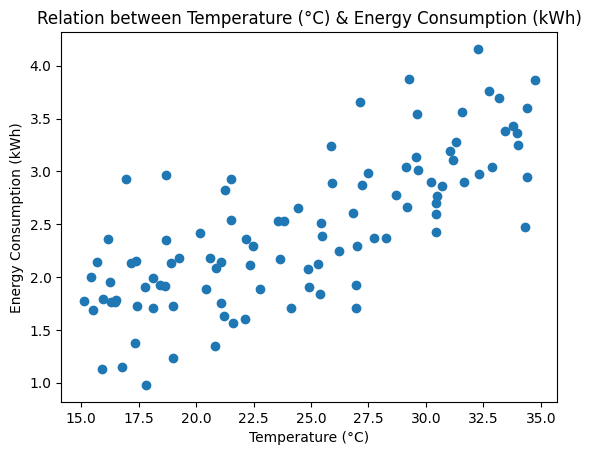

In [65]:
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.title('Relation between Temperature (°C) & Energy Consumption (kWh)')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Temperature (°C)')
plt.show()

In [66]:
# Features (independent variable) and target (dependent variable)
# Independent variable (Temperature)
X = df[['Temperature (°C)']]  
# Dependent variable (Energy Consumption)
y = df['Energy Consumption (kWh)']  
X

,Temperature (°C)
0,22.490802
1,34.014286
2,29.639879
3,26.973170
4,18.120373
...,...
95,24.875912
96,25.454657
97,23.550820
98,15.508383


In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [68]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Get the slope (coefficients)
slope = model.coef_

# Get the y-intercept
y_intercept = model.intercept_

# Print the values
print("Slope (Coefficients):", slope)
print("Y-Intercept:", y_intercept)

Slope (Coefficients): [0.09585398]
Y-Intercept: 0.10902278880548488


In [70]:
# y = mx + c

y = 0.0899*26.97 + 0.22
print('Predicted energy consumption(in Kwh):', y)

Predicted energy consumption(in Kwh): 2.644603


In [71]:
re  = 1.70 - 2.64
print('residual_error:', re)

residual_error: -0.9400000000000002


In [72]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [73]:
y_pred

array([1.61275804, 3.02483798, 1.73407773, 1.65818342, 1.76896272,
       1.67154159, 2.42115498, 2.26485574, 3.36592163, 2.62284558,
       1.68975203, 2.29195782, 1.92254726, 2.95012318, 2.69305437,
       1.55741884, 2.23403985, 2.13008911, 3.05207734, 2.53266087])

In [34]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-Squared value
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

Mean Squared Error: 0.16342487842925052
R-Squared: 0.6119478445218715


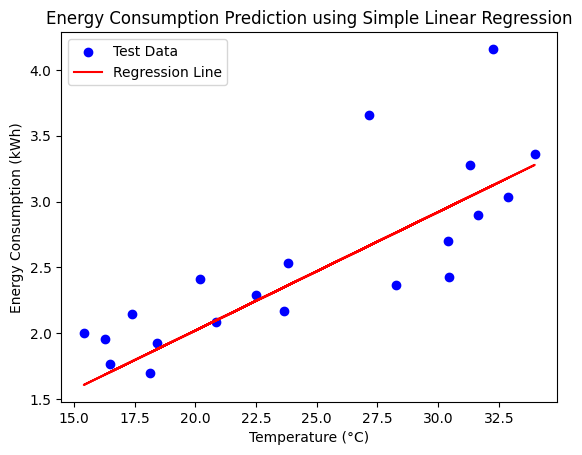

In [35]:
# Plot the test data and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')  # Actual data
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [36]:
import joblib
# Save the model to a file
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [37]:
# Load the model from the file
model = joblib.load('appliance_energy_model.pkl')

In [38]:
# Example input data
input_data = [[26.97]]  

In [39]:
# Make predictions
prediction = model.predict(input_data)

# Print the prediction
print("Predicted appliance energy consumption:", prediction)

# Actual Energy Consumption = 1.703533

Predicted appliance energy consumption: [2.64835187]


c:\Users\Win 10\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
